# Single Phase Diffusion

## Example - NiCrAl System

Along with precipitation, kawin also supports one dimensional diffusion models. In this example, a diffusion couple will be simulated between two different NiCrAl compositions. Both phases will be FCC.

Note: Fluxes are calculated on a volume fixed frame of reference. In this frame of reference, the location of the Matano plane is fixed. If a lattice fixed frame of reference is used, then the movement of the Matano plane can be predicted (this would be similar to the Smigelskas–Kirkendall experiments).

## Setup

The diffusion model is composed of two modules: Thermodynamics and Mesh. The Thermodynamics module defines the functions to calculate diffusivity from mobility and free energy terms. The Mesh object defines the functions to handle a one dimensional mesh and calculate fluxes between volume elements of the mesh.

Loading the Thermodynamics object is the same as done for creating a precipitation model.

In [1]:
from kawin.Thermodynamics import MulticomponentThermodynamics

therm = MulticomponentThermodynamics('NiCrAl.tdb', ['NI', 'CR', 'AL'], ['FCC_A1'])

The next step is to create the mesh. The Mesh object requires the z-coordinates, elements and phases upon initialization. Initial conditions can be added with the composition either as a step function, linear function, delta function or a user-defined function. Finally, boundary conditions are assumed to be no-flux conditions; however, constant flux or composition may also be defined.

Defining the initial and boundary conditions must specify the element it is being applied to.

Here, a diffusion couple composed of Ni-7.7Cr-5.4Al / Ni-35.9Cr-6.2Al will be used.

In [2]:
from kawin.Mesh import Mesh1D

#Define mesh spanning between -1mm to 1mm with 50 volume elements
m = Mesh1D([-1e-3, 1e-3], 50, ['NI', 'CR', 'AL'], ['FCC_A1'])

#Define Cr and Al composition, with step-wise change at z=0
m.setCompositionStep(0.077, 0.359, 0, 'CR')
m.setCompositionStep(0.054, 0.062, 0, 'AL')

The DiffusionModel object interfaces between the Thermodynamics and Mesh modules to perform the simulation. All that is needed is to set the temperature and time of simulation. The time increment or number of iterations is not needed since it is calculated on the fly.

Similar to the precipitation model, progress on the simulation can be outputted by setting verbose to True and setting vIt to the number of iterations before a status update on the model is outputted.

In [3]:
from kawin.Diffusion import DiffusionModel

d = DiffusionModel(therm, m)
d.setTemperature(1200 + 273.15)
d.solve(100*3600, verbose=True, vIt=10)

Iteration	Sim Time (h)	Run time (s)
0		0.000		0.000
10		11.690		2.733
20		23.380		5.895
30		35.070		8.954
40		46.760		11.974
50		58.452		14.901
60		70.146		17.795
70		81.851		20.553
80		93.574		23.206
86		100.000		24.891


### Plotting

Plotting functions are stored in the mesh object.

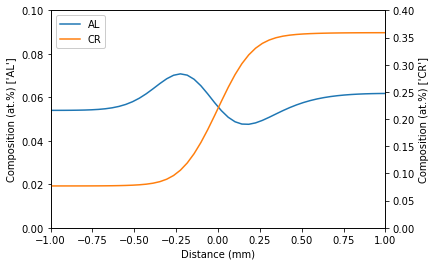

In [4]:
import matplotlib.pyplot as plt

fig, axL = plt.subplots(1, 1)
axL, axR = m.plotTwoAxis(axL, ['AL'], ['CR'], zScale = 1/1000)
axL.set_xlim([-1, 1])
axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.1])
axR.set_ylim([0, 0.4])
plt.show()